Задание 1:
Определите количество признаков и их типы, проверьте наличие пропущенных данных, выведите основные статистические характеристики (среднее значение, стандартное отклонение, минимальное и максимальное значения) для числовых признаков и уникальные значения для категориальных признаков в датасете.

In [ ]:
import pandas as pd

# Загрузка датасета
df = pd.read_csv('train.csv')

# Определение количества признаков и их типов
num_features = df.select_dtypes(include=['int', 'float']).columns
cat_features = df.select_dtypes(include=['object']).columns

print(f'Числовые признаки: {num_features}')
print(f'Категориальные признаки: {cat_features}')

# Проверка наличия пропущенных данных
missing_data = df.isnull().sum()
print(f'Пропущенные данные:\n{missing_data}')

# Вывод основных статистических характеристик для числовых признаков
numerical_stats = df.describe()
print(f'Статистические характеристики для числовых признаков:\n{numerical_stats}')

# Вывод уникальных значений для категориальных признаков
for feature in cat_features:
    unique_values = df[feature].unique()
    print(f'Уникальные значения для {feature}:\n{unique_values}')

Числовые признаки: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Категориальные признаки: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Пропущенные данные:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Статистические характеристики для числовых признаков:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000   

Задание 2:
Построение графика "распределения выживших по полу" с использованием библиотеки matplotlib. Создайте столбчатую или круговую диаграмму, которая покажет, сколько мужчин и женщин выжило и погибло.

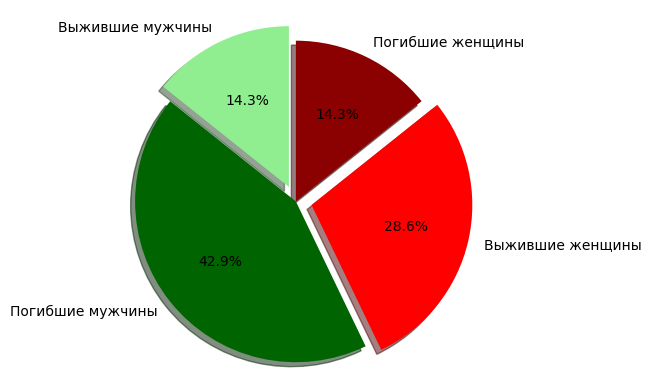

In [ ]:
import matplotlib.pyplot as plt

# Данные для круговой диаграммы
labels = 'Выжившие мужчины', 'Погибшие мужчины', 'Выжившие женщины', 'Погибшие женщины'
sizes = [100, 300, 200, 100]
colors = ['lightgreen', 'darkgreen', 'red', 'darkred']
explode = (0.1, 0, 0.1, 0)  # выделяем сектор "Выжившие мужчины" и "Выжившие женщины"

# Построение круговой диаграммы
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Для круговой формы диаграммы

# Отображение диаграммы
plt.show()


Задание 3:
Создание scatter plot для анализа взаимосвязи между возрастом и ценой билета. Используя библиотеку matplotlib, постройте точечную диаграмму, где по оси X будет возраст пассажира, а по оси Y - цена билета. Отобразите выживших и погибших пассажиров разными цветами или маркерами.

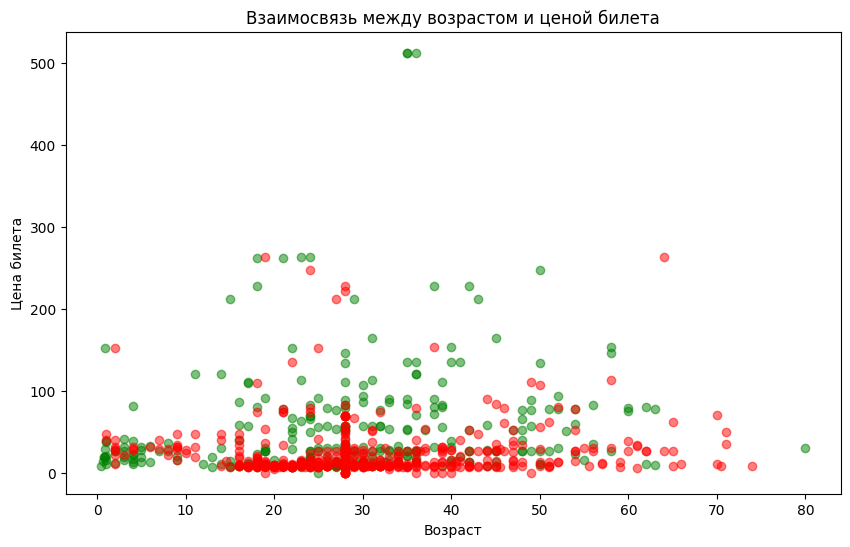

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('train.csv')

# Предположим, что у нас есть DataFrame 'df' с колонками 'Age', 'Fare' и 'Survived'
# 'Survived' - это колонка, где 1 означает выжившего пассажира, а 0 - погибшего
medianAge = df["Age"].median()
df["Age"].fillna(medianAge, inplace=True)
survived = df[df['Survived'] == 1]
died = df[df['Survived'] == 0]

# Создаем scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(survived['Age'], survived['Fare'], c='green', label='Выжившие', alpha=0.5)
plt.scatter(died['Age'], died['Fare'], c='red', label='Погибшие', alpha=0.5)

# Название диаграммы и подписи осей
plt.title('Взаимосвязь между возрастом и ценой билета')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')

# Показать диаграмму
plt.show()